### ADC and DAC Linearity Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

Digital to Analog Converter (DAC)

+-----------------------------------+
|             Input Data            |
+---+----+---------+-----+----------+
| i | x  |    y    |  x² |    xy    |
+---+----+---------+-----+----------+
| 1 | 0  |  -0.001 |  0  |   -0.0   |
| 2 | 1  |  -1.284 |  1  |  -1.284  |
| 3 | 2  |  -2.569 |  4  |  -5.138  |
| 4 | 3  |  -3.855 |  9  | -11.565  |
| 5 | 4  |   -5.1  |  16 |  -20.4   |
| 6 | 5  |  -6.39  |  25 |  -31.95  |
| 7 | 6  |  -7.68  |  36 |  -46.08  |
| 8 | 7  |  -8.96  |  49 |  -62.72  |
| Σ | 28 | -35.839 | 140 | -179.137 |
+---+----+---------+-----+----------+ 

+-------------------------------------------+
|      Fit Results & Statistical Errors     |
+------------------+----------+-------------+
|    Parameter     |  Value   | Uncertainty |
+------------------+----------+-------------+
|    Slope (a₁)    | -1.2786  |   ±0.0017   |
|  Intercept (a₀)  | -0.0048  |   ±0.0072   |
| σ_y (Std. Error) |  0.0111  |             |
|    Δ (delta)     | 336.0000 |             |
+-------------

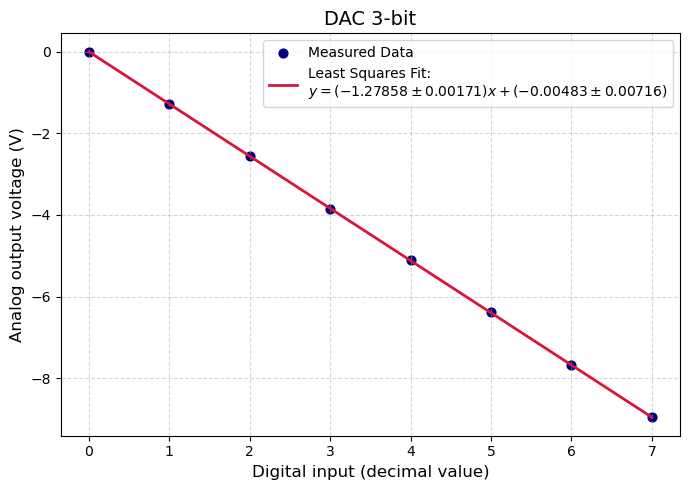

In [2]:
x = np.array([0,1,2,3,4,5,6,7])
y = np.array([-0.001,-1.284,-2.569,-3.855,-5.10,-6.39,-7.68,-8.96])
n = len(x)

# --- Data Table ---
table_data = PrettyTable(["i", "x", "y", "x²", "xy"])
for i in range(n):
    table_data.add_row([i+1, round(x[i], 3), round(y[i], 3), round(x[i]**2, 3), round(x[i]*y[i], 3)])
table_data.add_row(["Σ", round(np.sum(x), 3), round(np.sum(y), 3), round(np.sum(x**2), 3), round(np.sum(x*y), 3)])
table_data.title = "Input Data"
print(table_data, "\n")

# --- Least Squares Calculation ---
Sx = np.sum(x)
Sy = np.sum(y)
Sxx = np.sum(x**2)
Sxy = np.sum(x*y)

delta = n*Sxx - Sx**2
a1 = (n*Sxy - Sx*Sy) / delta  # Slope
a0 = (Sxx*Sy - Sx*Sxy) / delta  # Intercept

# --- Error Analysis ---
y_fit = a0 + a1*x
residuals = y - y_fit
sigma_y = np.sqrt(np.sum(residuals**2) / (n-2))
sigma_a1 = sigma_y * np.sqrt(n / delta)
sigma_a0 = sigma_y * np.sqrt(Sxx / delta)

# --- Results Table ---
results = PrettyTable(["Parameter", "Value", "Uncertainty"])
results.title = "Fit Results & Statistical Errors"
results.add_row(["Slope (a₁)", f"{a1:.4f}", f"±{sigma_a1:.4f}"])
results.add_row(["Intercept (a₀)", f"{a0:.4f}", f"±{sigma_a0:.4f}"])
results.add_row(["σ_y (Std. Error)", f"{sigma_y:.4f}", ""])
results.add_row(["Δ (delta)", f"{delta:.4f}", ""])
print(results, "\n")

# --- Fitted Values Table ---
fit_table = PrettyTable(["x", "y (measured)", "y (fit)"])
fit_table.title = "Measured vs Fitted Values"
for xi, yi, yfi in zip(x, y, y_fit):
    fit_table.add_row([round(xi, 3), round(yi, 3), round(yfi, 3)])
print(fit_table, "\n")

# --- Plotting ---
plt.figure(figsize=(7,5))
plt.scatter(x, y, color='navy', label='Measured Data', s=40)
plt.plot(x, y_fit, color='crimson', linewidth=2,
         label=f'Least Squares Fit:\n$y = ({a1:.5f} \pm {sigma_a1:.5f})x + ({a0:.5f} \pm {sigma_a0:.5f})$')
plt.xlabel("Digital input (decimal value)", fontsize=12)
plt.ylabel("Analog output voltage (V)", fontsize=12)
plt.title("DAC 3-bit", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

+--------------------------------------+
|              Input Data              |
+----+-----+---------+------+----------+
| i  |  x  |    y    |  x²  |    xy    |
+----+-----+---------+------+----------+
| 1  |  0  |  -0.001 |  0   |   -0.0   |
| 2  |  1  |  -0.639 |  1   |  -0.639  |
| 3  |  2  |  -1.282 |  4   |  -2.564  |
| 4  |  3  |  -1.924 |  9   |  -5.772  |
| 5  |  4  |  -2.569 |  16  | -10.276  |
| 6  |  5  |  -3.219 |  25  | -16.095  |
| 7  |  6  |  -3.857 |  36  | -23.142  |
| 8  |  7  |   -4.5  |  49  |  -31.5   |
| 9  |  8  |  -5.11  |  64  |  -40.88  |
| 10 |  9  |  -5.75  |  81  |  -51.75  |
| 11 |  10 |  -6.39  | 100  |  -63.9   |
| 12 |  11 |  -7.04  | 121  |  -77.44  |
| 13 |  12 |  -7.68  | 144  |  -92.16  |
| 14 |  13 |  -8.32  | 169  | -108.16  |
| 15 |  14 |  -8.96  | 196  | -125.44  |
| 16 |  15 |  -9.61  | 225  | -144.15  |
| Σ  | 120 | -76.851 | 1240 | -793.868 |
+----+-----+---------+------+----------+ 

+--------------------------------------------+
|      F

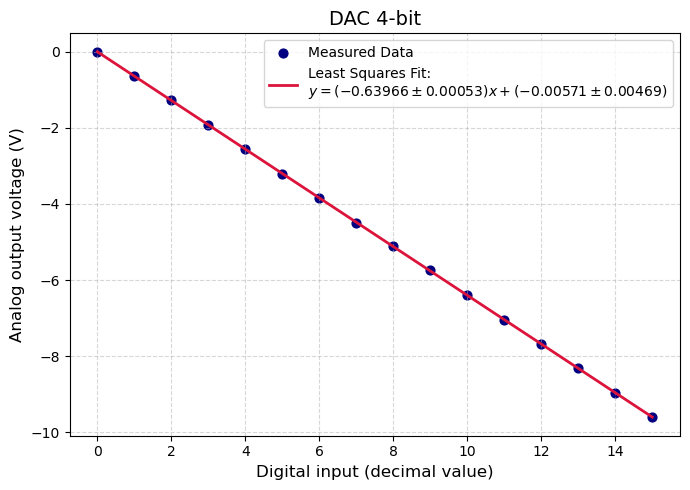

In [3]:
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
y = np.array([-0.001,-0.639,-1.282,-1.924,-2.569,-3.219,-3.857,-4.50,-5.11,-5.75,-6.39,-7.04,-7.68,-8.32,-8.96,-9.61])
n = len(x)

# --- Data Table ---
table_data = PrettyTable(["i", "x", "y", "x²", "xy"])
for i in range(n):
    table_data.add_row([i+1, round(x[i], 3), round(y[i], 3), round(x[i]**2, 3), round(x[i]*y[i], 3)])
table_data.add_row(["Σ", round(np.sum(x), 3), round(np.sum(y), 3), round(np.sum(x**2), 3), round(np.sum(x*y), 3)])
table_data.title = "Input Data"
print(table_data, "\n")

# --- Least Squares Calculation ---
Sx = np.sum(x)
Sy = np.sum(y)
Sxx = np.sum(x**2)
Sxy = np.sum(x*y)

delta = n*Sxx - Sx**2
a1 = (n*Sxy - Sx*Sy) / delta  # Slope
a0 = (Sxx*Sy - Sx*Sxy) / delta  # Intercept

# --- Error Analysis ---
y_fit = a0 + a1*x
residuals = y - y_fit
sigma_y = np.sqrt(np.sum(residuals**2) / (n-2))
sigma_a1 = sigma_y * np.sqrt(n / delta)
sigma_a0 = sigma_y * np.sqrt(Sxx / delta)

# --- Results Table ---
results = PrettyTable(["Parameter", "Value", "Uncertainty"])
results.title = "Fit Results & Statistical Errors"
results.add_row(["Slope (a₁)", f"{a1:.4f}", f"±{sigma_a1:.4f}"])
results.add_row(["Intercept (a₀)", f"{a0:.4f}", f"±{sigma_a0:.4f}"])
results.add_row(["σ_y (Std. Error)", f"{sigma_y:.4f}", ""])
results.add_row(["Δ (delta)", f"{delta:.4f}", ""])
print(results, "\n")

# --- Fitted Values Table ---
fit_table = PrettyTable(["x", "y (measured)", "y (fit)"])
fit_table.title = "Measured vs Fitted Values"
for xi, yi, yfi in zip(x, y, y_fit):
    fit_table.add_row([round(xi, 3), round(yi, 3), round(yfi, 3)])
print(fit_table, "\n")

# --- Plotting ---
plt.figure(figsize=(7,5))
plt.scatter(x, y, color='navy', label='Measured Data', s=40)
plt.plot(x, y_fit, color='crimson', linewidth=2,
         label=f'Least Squares Fit:\n$y = ({a1:.5f} \pm {sigma_a1:.5f})x + ({a0:.5f} \pm {sigma_a0:.5f})$')
plt.xlabel("Digital input (decimal value)", fontsize=12)
plt.ylabel("Analog output voltage (V)", fontsize=12)
plt.title("DAC 4-bit", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Analog to Digital Convertor with BCD display

+----------------------------+
|         Input Data         |
+---+-----+---+-------+------+
| i |  x  | y |   x²  |  xy  |
+---+-----+---+-------+------+
| 1 | 0.0 | 0 |  0.0  | 0.0  |
| 2 | 1.3 | 1 |  1.69 | 1.3  |
| 3 | 2.6 | 2 |  6.76 | 5.2  |
| 4 | 3.8 | 3 | 14.44 | 11.4 |
| Σ | 7.7 | 6 | 22.89 | 17.9 |
+---+-----+---+-------+------+ 

+------------------------------------------+
|     Fit Results & Statistical Errors     |
+------------------+---------+-------------+
|    Parameter     |  Value  | Uncertainty |
+------------------+---------+-------------+
|    Slope (a₁)    |  0.7871 |   ±0.0107   |
|  Intercept (a₀)  | -0.0152 |   ±0.0257   |
| σ_y (Std. Error) |  0.0305 |             |
|    Δ (delta)     | 32.2700 |             |
+------------------+---------+-------------+ 

+------------------------------+
|  Measured vs Fitted Values   |
+-----+--------------+---------+
|  x  | y (measured) | y (fit) |
+-----+--------------+---------+
| 0.0 |      0       |  -0.015 |
| 1.3 |

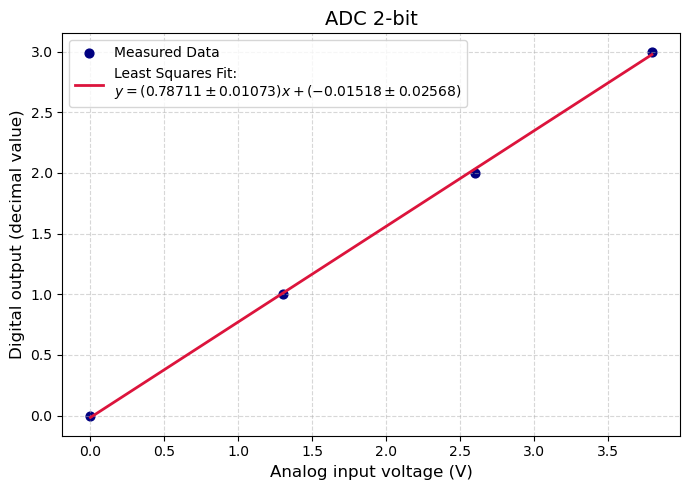

In [4]:
x = np.array([0,1.3,2.6,3.8])
y = np.array([0,1,2,3])
n = len(x)

# --- Data Table ---
table_data = PrettyTable(["i", "x", "y", "x²", "xy"])
for i in range(n):
    table_data.add_row([i+1, round(x[i], 3), round(y[i], 3), round(x[i]**2, 3), round(x[i]*y[i], 3)])
table_data.add_row(["Σ", round(np.sum(x), 3), round(np.sum(y), 3), round(np.sum(x**2), 3), round(np.sum(x*y), 3)])
table_data.title = "Input Data"
print(table_data, "\n")

# --- Least Squares Calculation ---
Sx = np.sum(x)
Sy = np.sum(y)
Sxx = np.sum(x**2)
Sxy = np.sum(x*y)

delta = n*Sxx - Sx**2
a1 = (n*Sxy - Sx*Sy) / delta  # Slope
a0 = (Sxx*Sy - Sx*Sxy) / delta  # Intercept

# --- Error Analysis ---
y_fit = a0 + a1*x
residuals = y - y_fit
sigma_y = np.sqrt(np.sum(residuals**2) / (n-2))
sigma_a1 = sigma_y * np.sqrt(n / delta)
sigma_a0 = sigma_y * np.sqrt(Sxx / delta)

# --- Results Table ---
results = PrettyTable(["Parameter", "Value", "Uncertainty"])
results.title = "Fit Results & Statistical Errors"
results.add_row(["Slope (a₁)", f"{a1:.4f}", f"±{sigma_a1:.4f}"])
results.add_row(["Intercept (a₀)", f"{a0:.4f}", f"±{sigma_a0:.4f}"])
results.add_row(["σ_y (Std. Error)", f"{sigma_y:.4f}", ""])
results.add_row(["Δ (delta)", f"{delta:.4f}", ""])
print(results, "\n")

# --- Fitted Values Table ---
fit_table = PrettyTable(["x", "y (measured)", "y (fit)"])
fit_table.title = "Measured vs Fitted Values"
for xi, yi, yfi in zip(x, y, y_fit):
    fit_table.add_row([round(xi, 3), round(yi, 3), round(yfi, 3)])
print(fit_table, "\n")

# --- Plotting ---
plt.figure(figsize=(7,5))
plt.scatter(x, y, color='navy', label='Measured Data', s=40)
plt.plot(x, y_fit, color='crimson', linewidth=2,
         label=f'Least Squares Fit:\n$y = ({a1:.5f} \pm {sigma_a1:.5f})x + ({a0:.5f} \pm {sigma_a0:.5f})$')
plt.ylabel("Digital output (decimal value)", fontsize=12)
plt.xlabel("Analog input voltage (V)", fontsize=12)
plt.title("ADC 2-bit", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

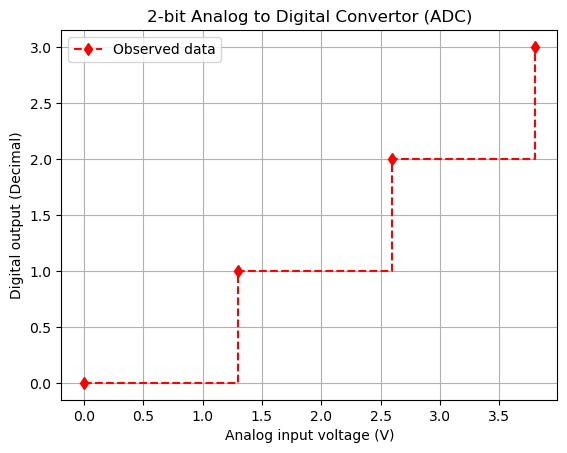

In [5]:
x = np.array([0,1.3,2.6,3.8])
y = np.array([0,1,2,3])

plt.figure()
plt.step(x, y, where='post', marker='d', linestyle='--', color='r', label='Observed data')
plt.xlabel('Analog input voltage (V)')
plt.ylabel('Digital output (Decimal)')
plt.title('2-bit Analog to Digital Convertor (ADC)')
plt.grid()
plt.legend()
plt.show()
